In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("mean")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("mean")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,34.332710
2018-01-01 01:00:00,AJAHUEL,31.011387
2018-01-01 02:00:00,AJAHUEL,29.534453
2018-01-01 03:00:00,AJAHUEL,26.974875
2018-01-01 04:00:00,AJAHUEL,25.090517


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,25.523283
2022-01-01 01:00:00,AJAHUEL,20.594772
2022-01-01 02:00:00,AJAHUEL,18.781695
2022-01-01 03:00:00,AJAHUEL,17.285021
2022-01-01 04:00:00,AJAHUEL,16.610544


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

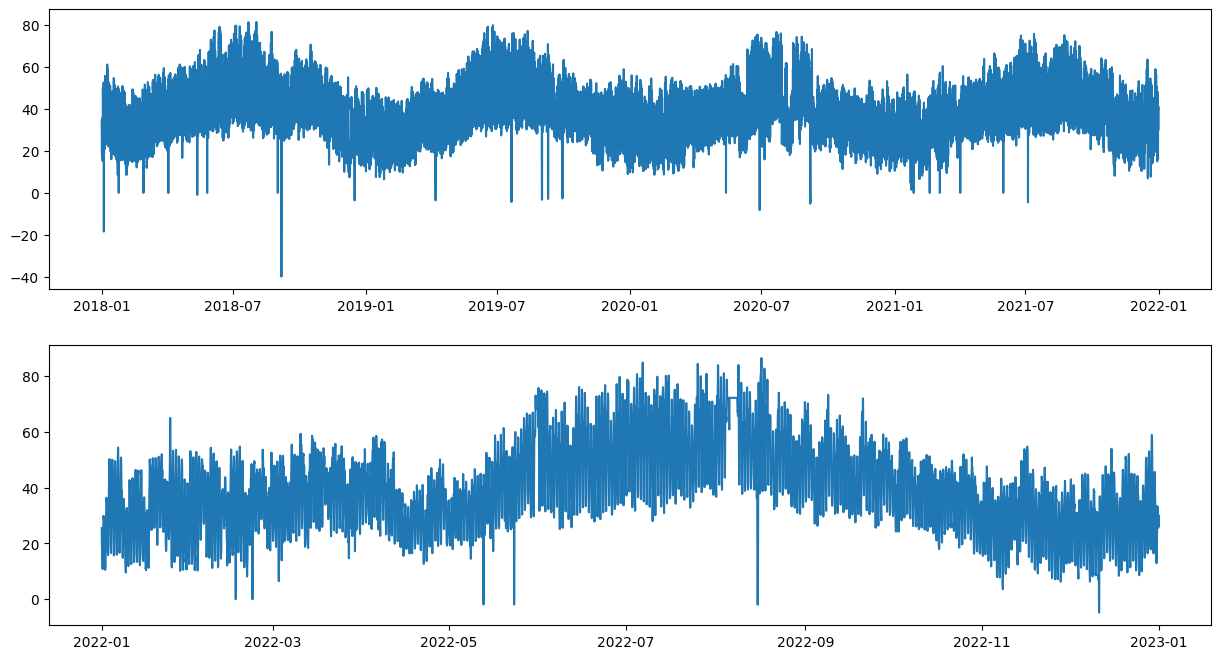

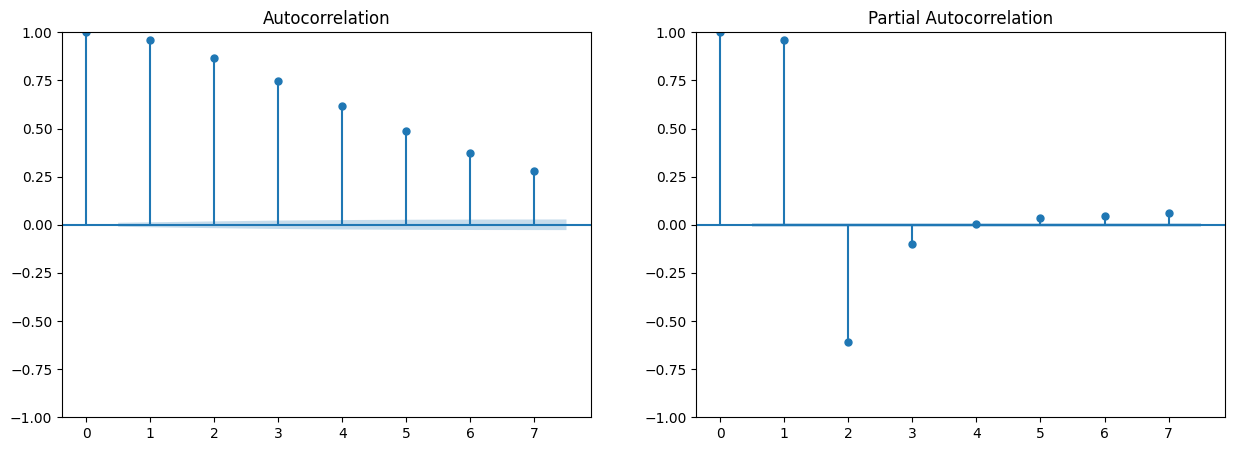

In [14]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

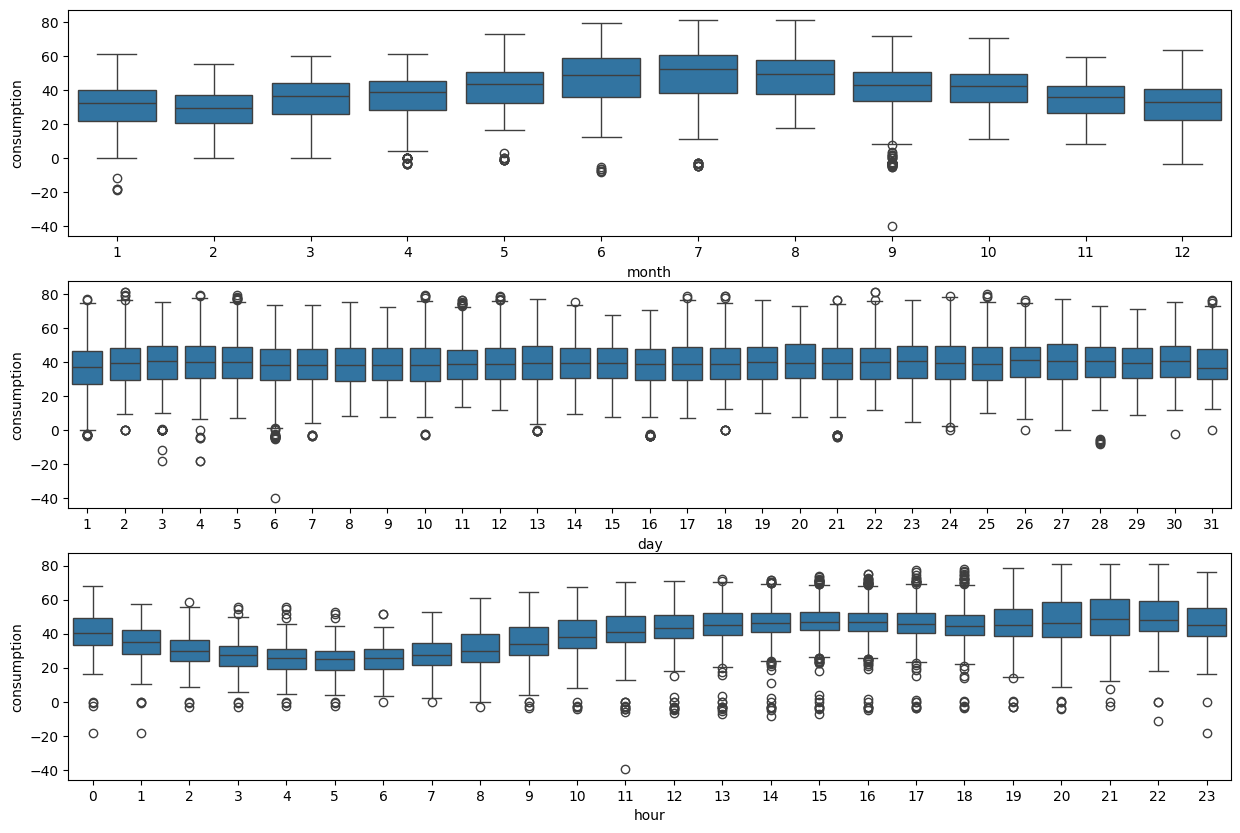

In [15]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [16]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int32         
 3   hour         34913 non-null  int32         
 4   month        34913 non-null  int32         
 5   year         34913 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4)
memory usage: 1.3 MB


In [17]:
data_ys=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys.to_csv("data_ys.csv")

In [18]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

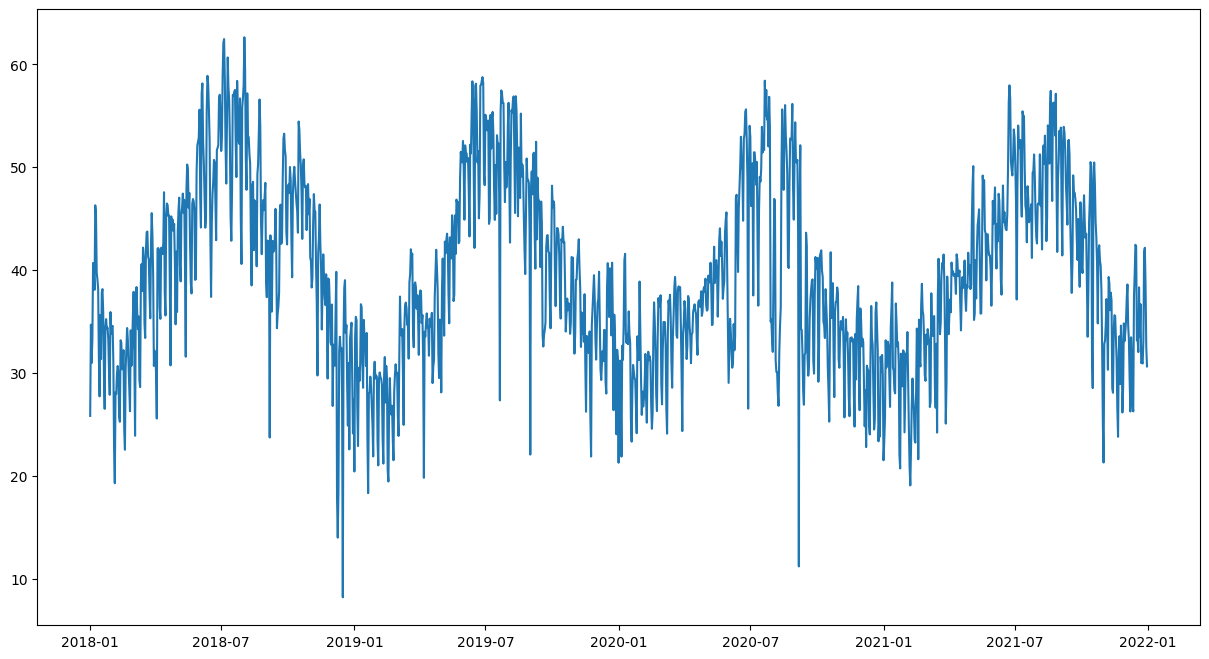

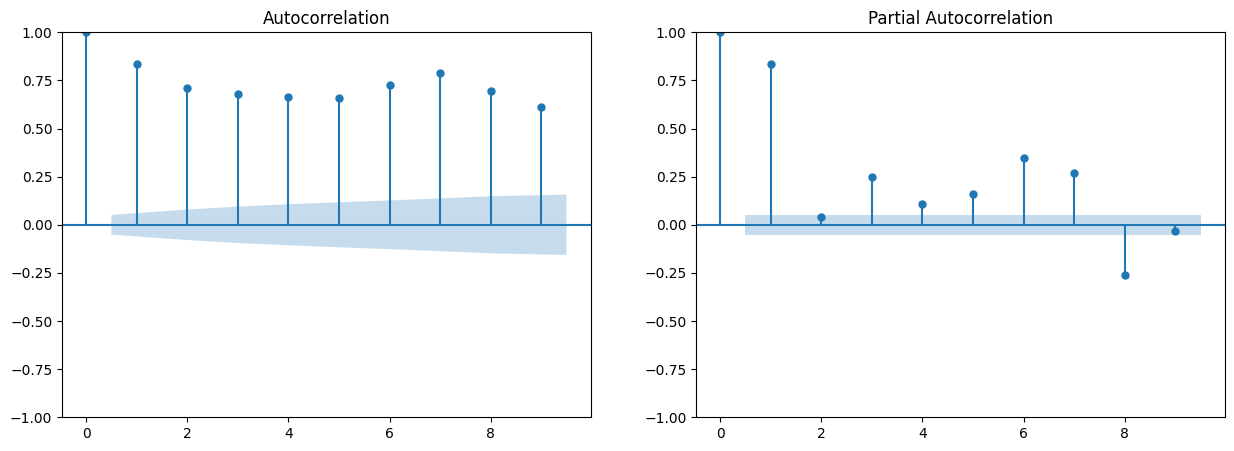

In [19]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.506842
p-value: 0.113819
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [21]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [22]:
modelo_ajahuel_d=ARIMA(ys,order=(8,0,8))
m_ad1=modelo_ajahuel_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 13.579168649196605
AIC 7983.962983666396
MAPE 0.07239476406646941


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


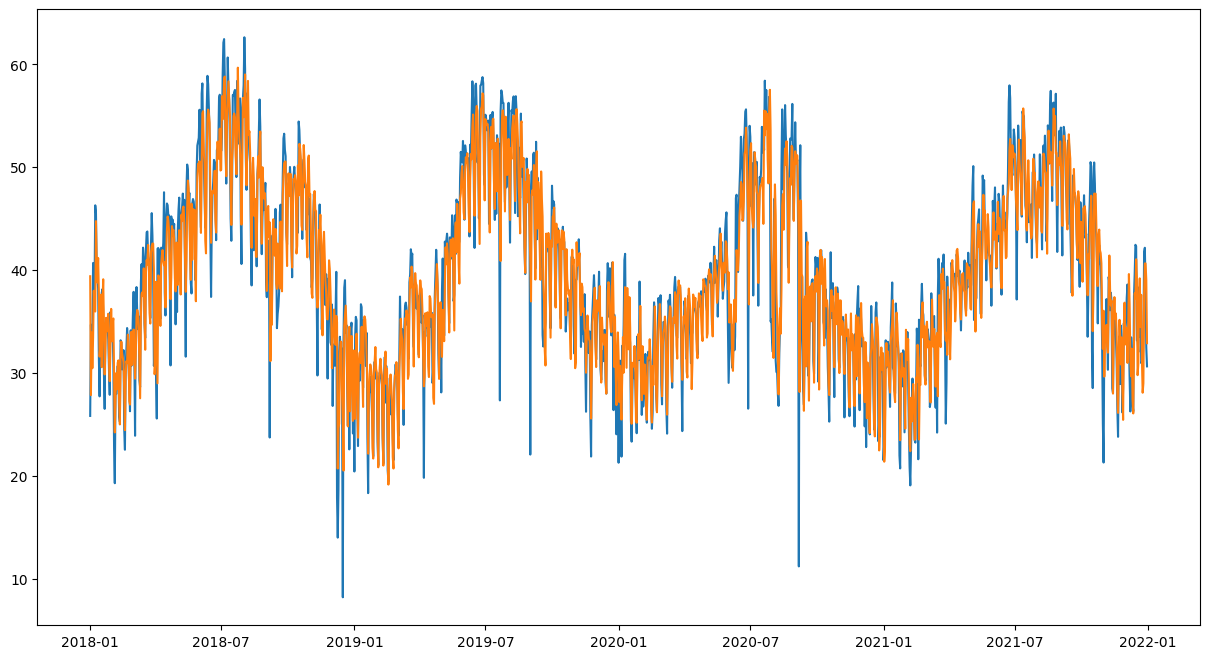

In [23]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [24]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [25]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [26]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

2024-04-28 17:52:23.634066: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,073 (387.00 KB)

 Trainable params: 99,073 (387.00 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 24882.9121 - mae: 153.5385 - mape: 97.1389 - mse: 24882.9121
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 18988.9238 - mae: 132.9746 - mape: 83.3449 - mse: 18988.9238
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 13719.8018 - mae: 111.4294 - mape: 68.9436 - mse: 13719.8018
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9065.7842 - mae: 88.1530 - mape: 53.4816 - mse: 9065.7842  
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5328.2900 - mae: 64.0653 - mape: 37.7718 - mse: 5328.2900
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2804.3018 - mae: 42.8547 - mape: 24.9072 - mse: 2804.3018
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1563.4531 - mae: 31.3674 - mape: 19.6556 - mse: 1563.4531
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1295.8198 - mae: 30.0227 - mape: 21.0086 - mse: 1295.8198
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 140

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


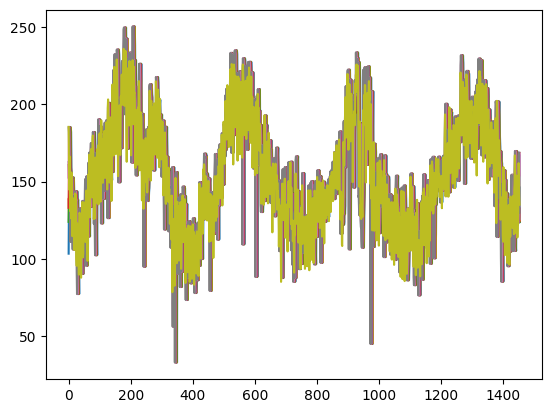

In [30]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

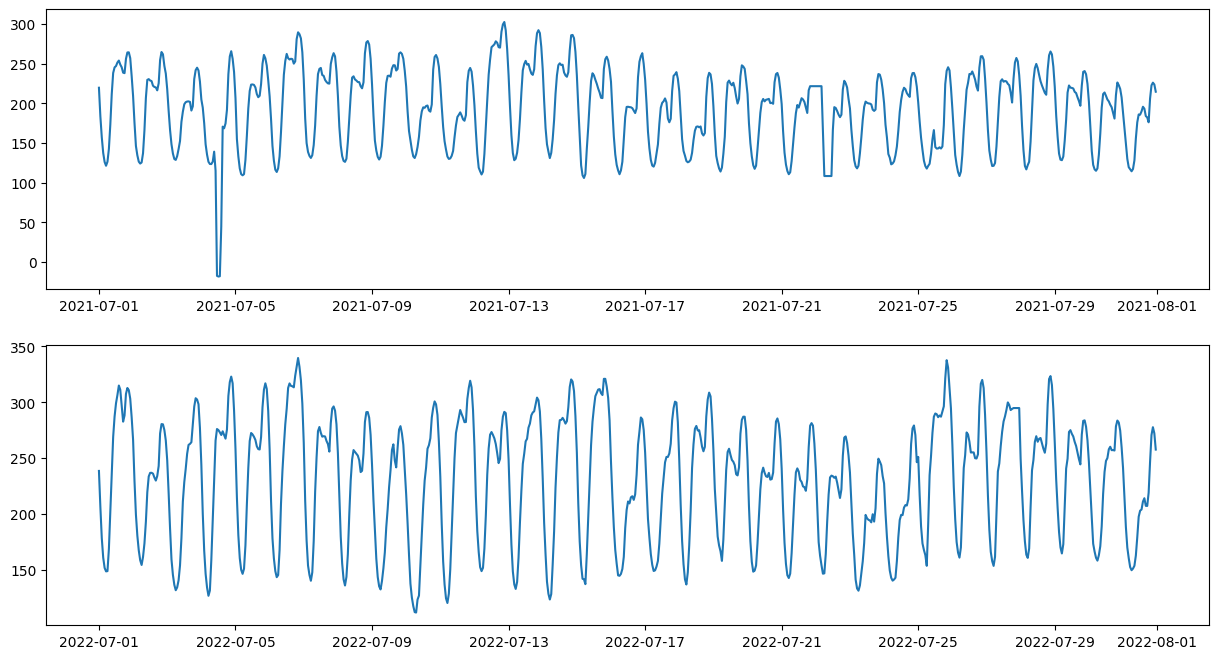

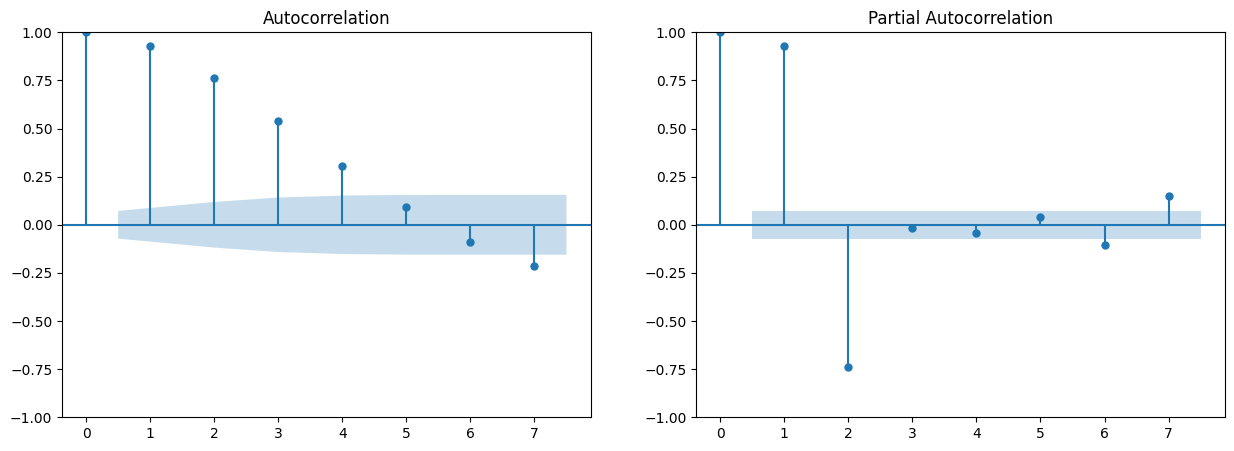

In [31]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

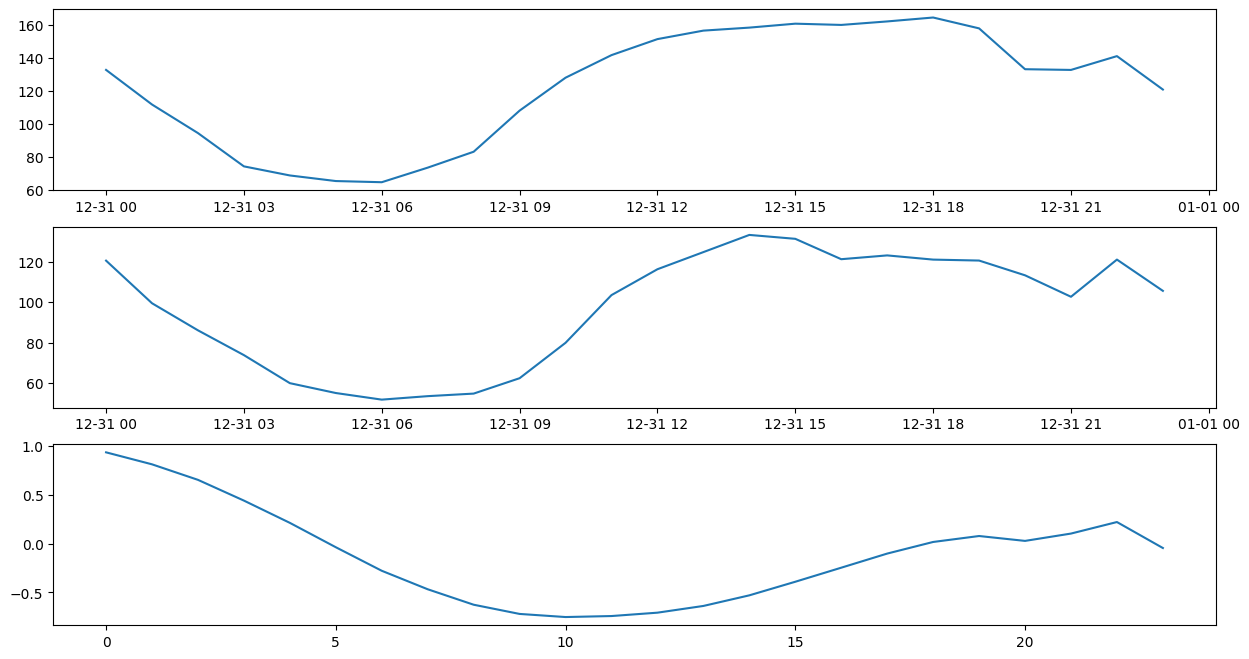

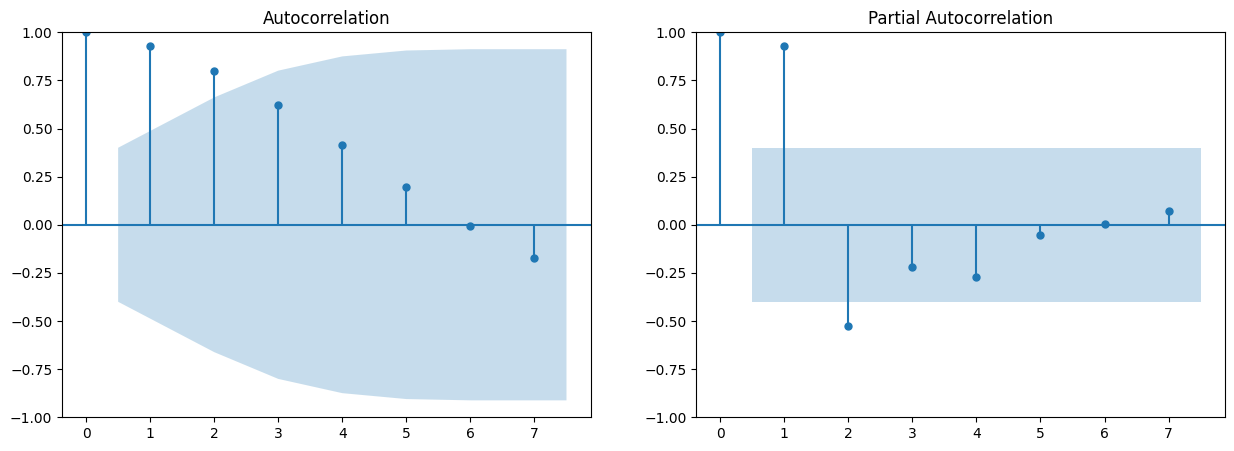

In [32]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

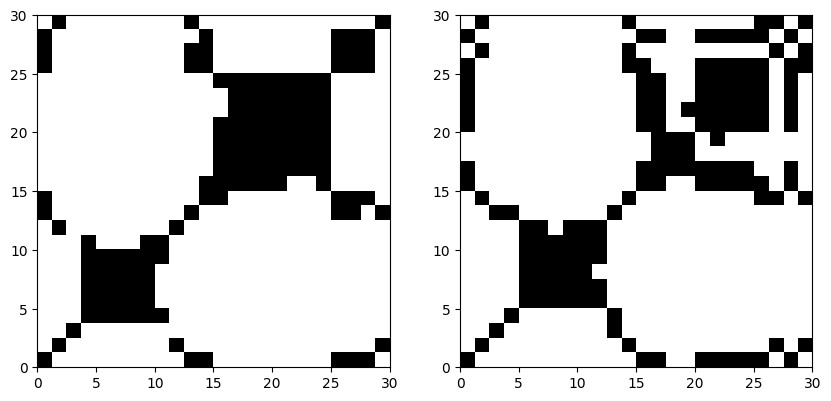

In [33]:
from pyts.image import RecurrencePlot

rp = RecurrencePlot(threshold=10)
y_rp = rp.transform(np.array([yd]))
yt_rp = rp.transform(np.array([ytd]))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].imshow(y_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);
axes[1].imshow(yt_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);

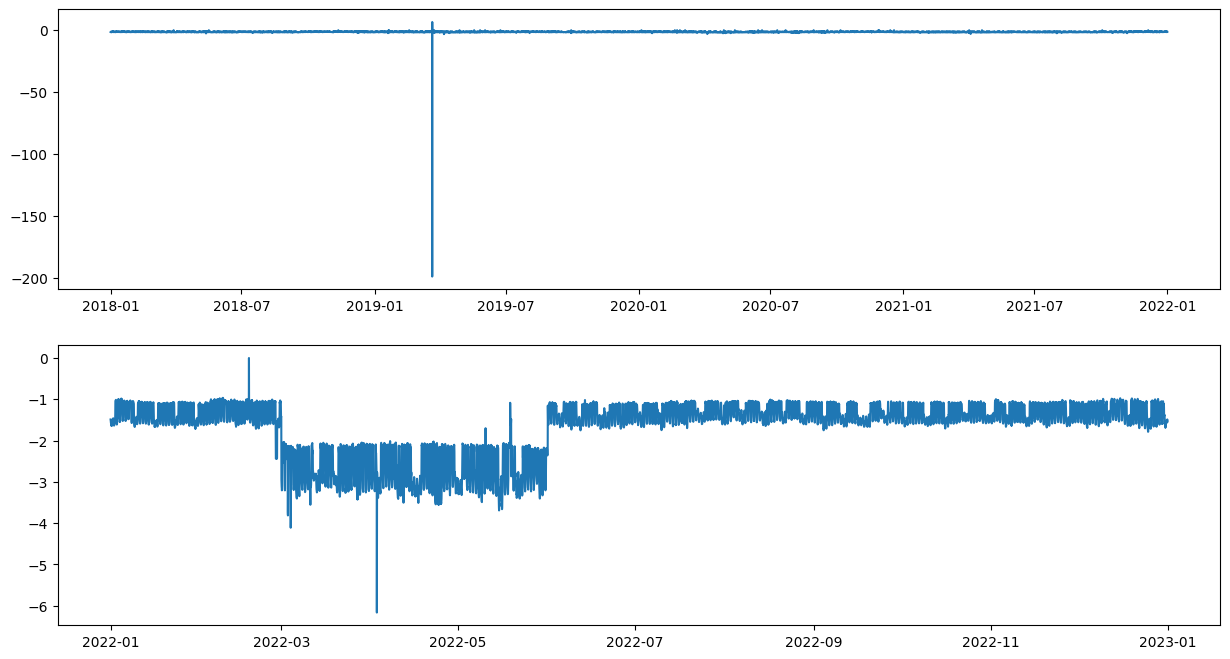

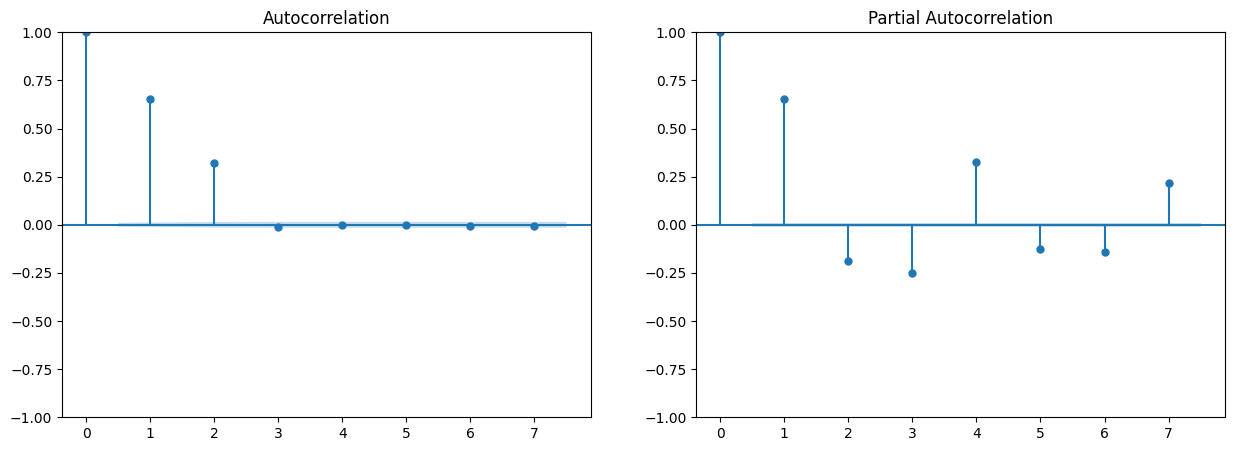

In [34]:
subestacion="BUIN"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

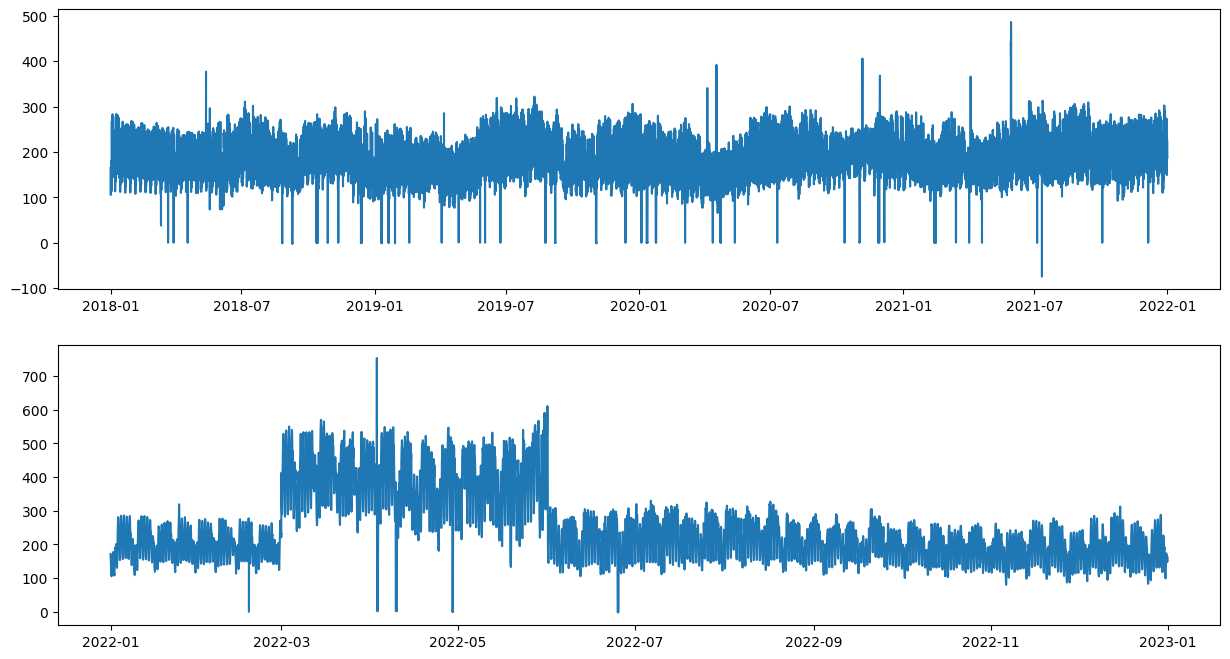

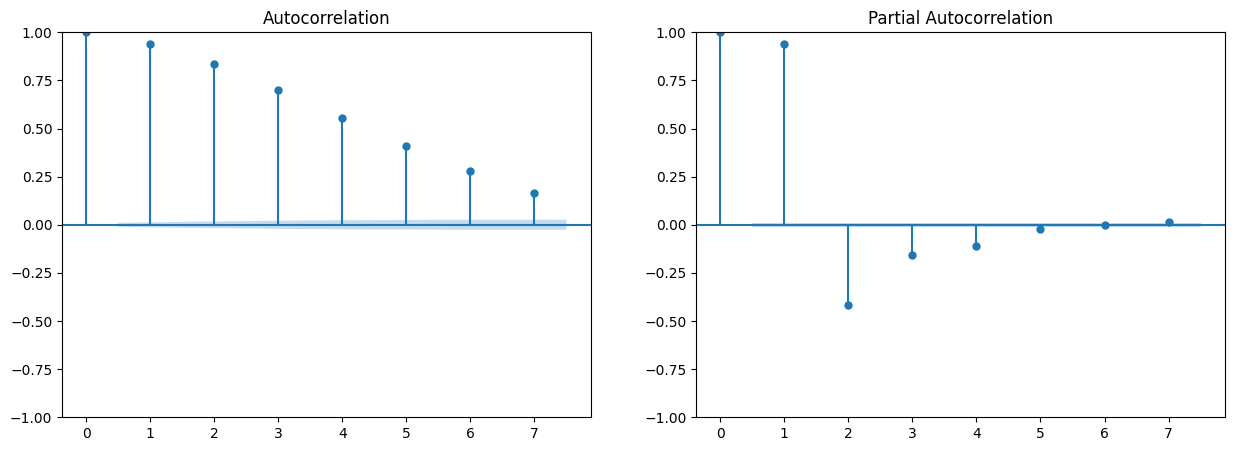

In [35]:
subestacion="CHENA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

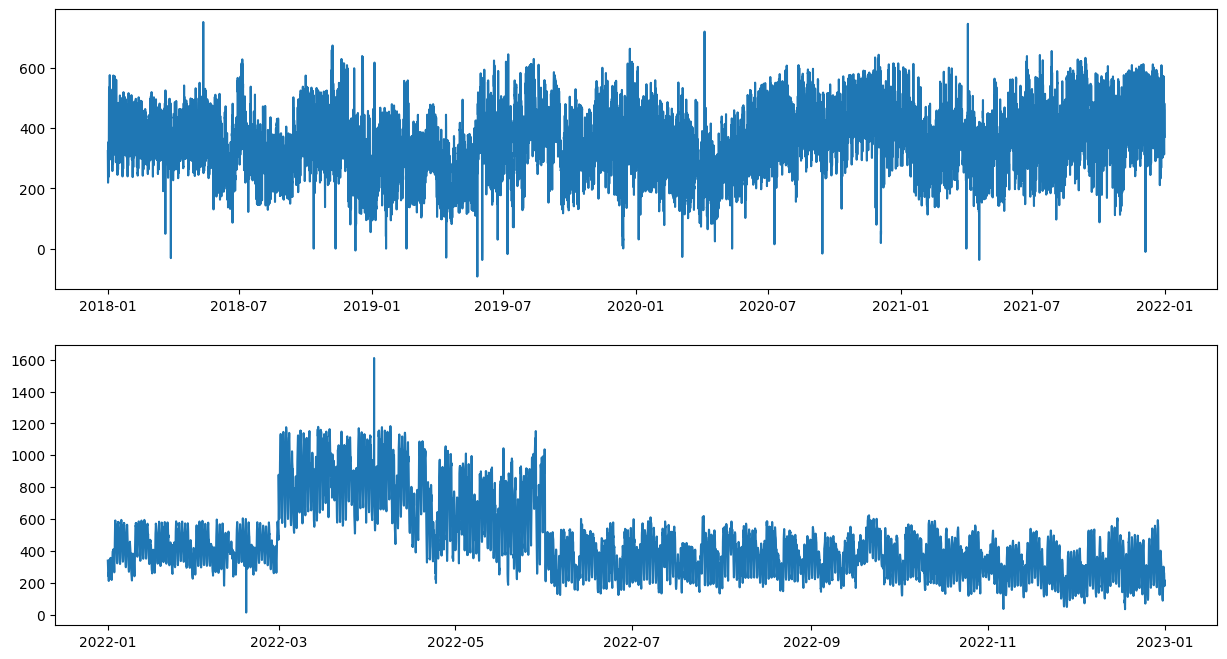

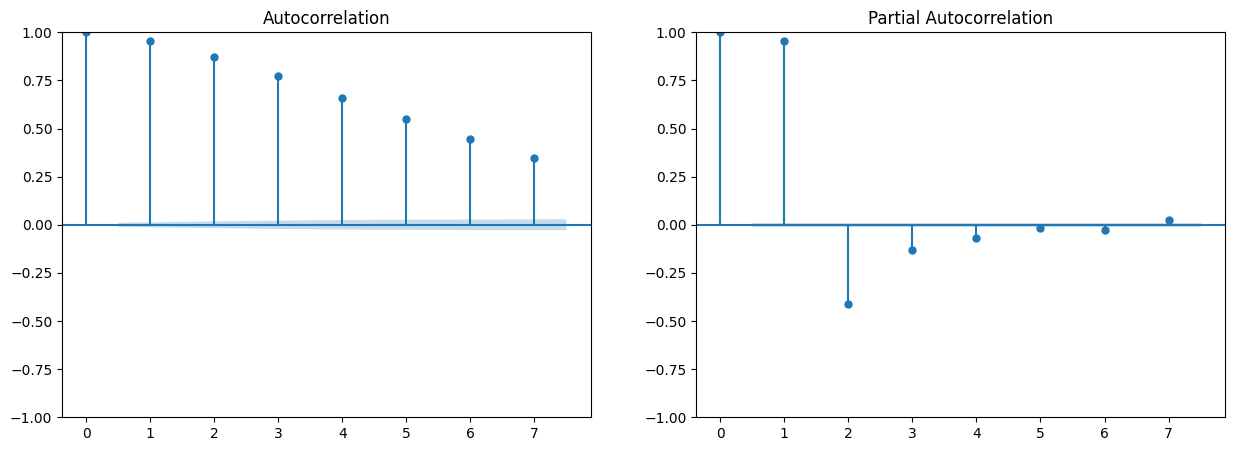

In [36]:
subestacion="CNAVIA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

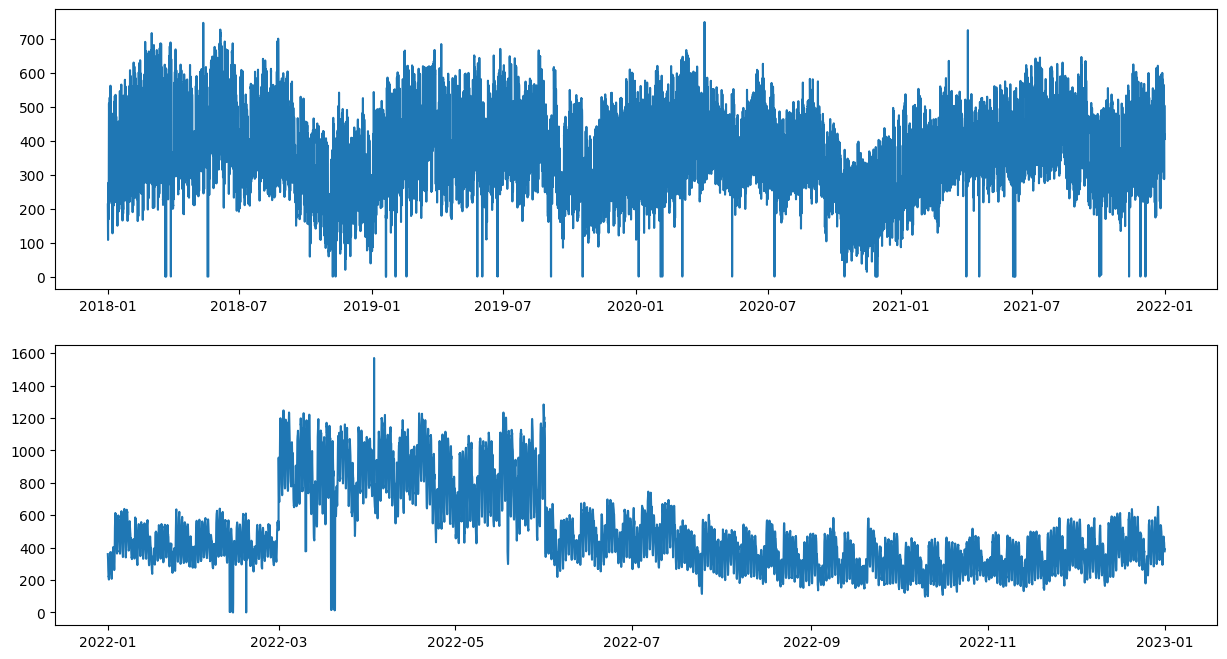

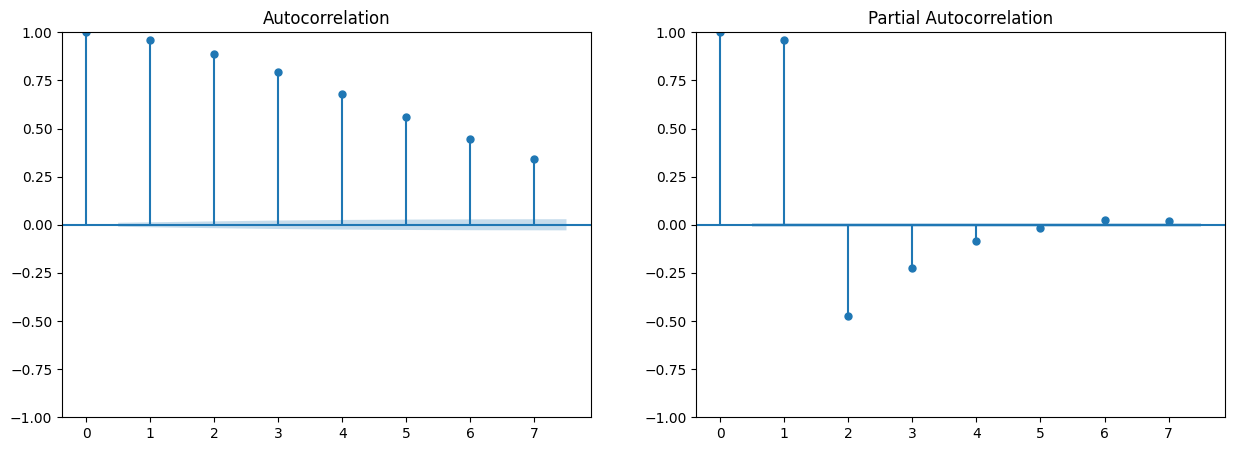

In [37]:
subestacion="ELSALTO"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

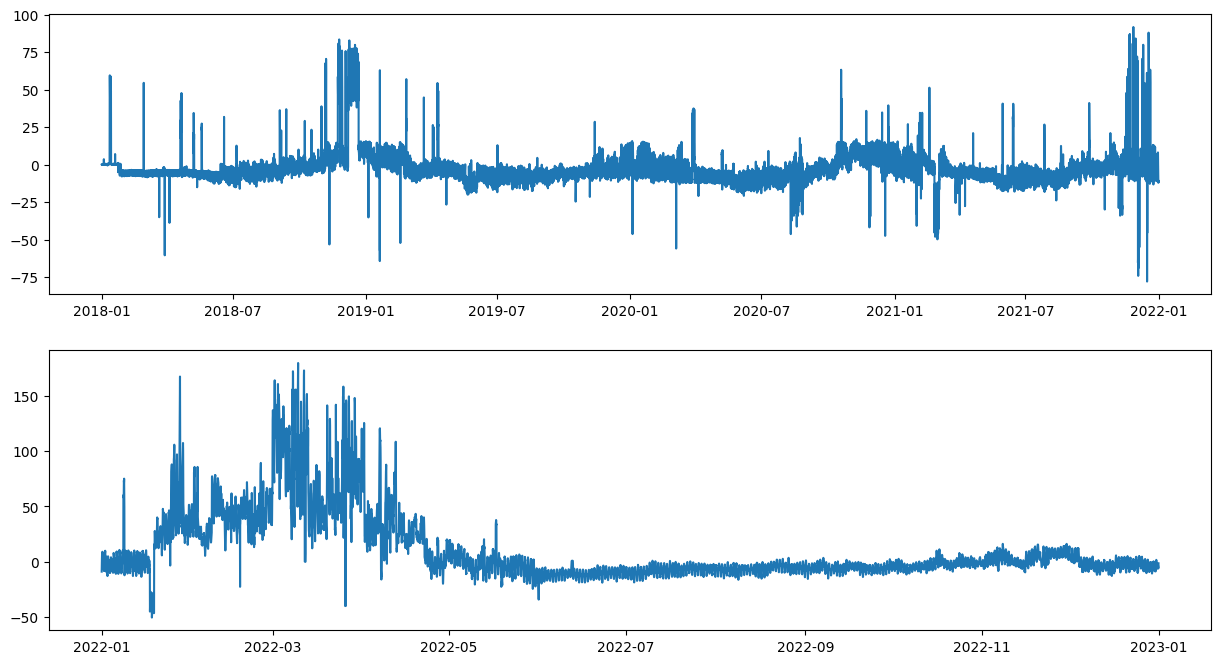

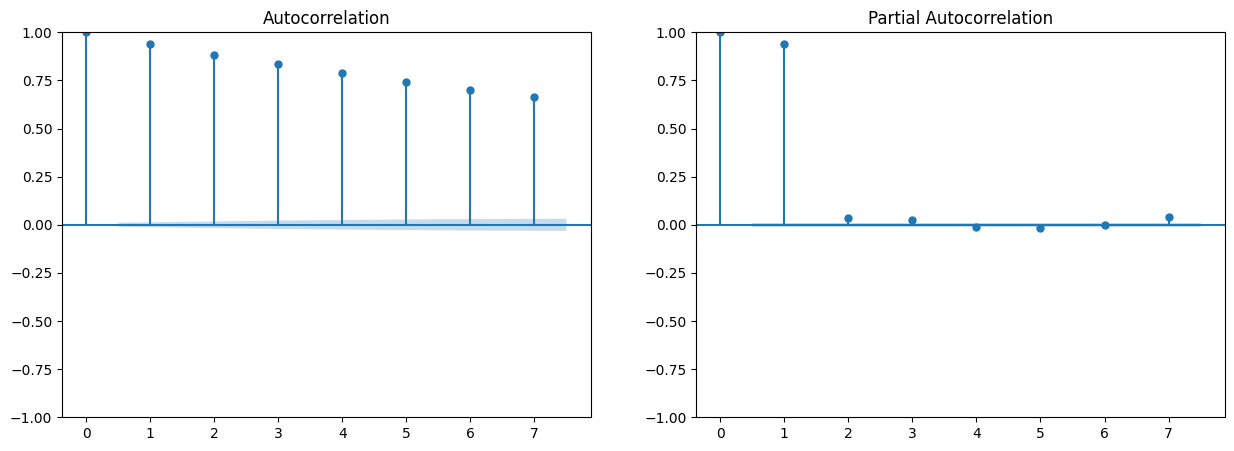

In [38]:
subestacion="FLORIDA"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

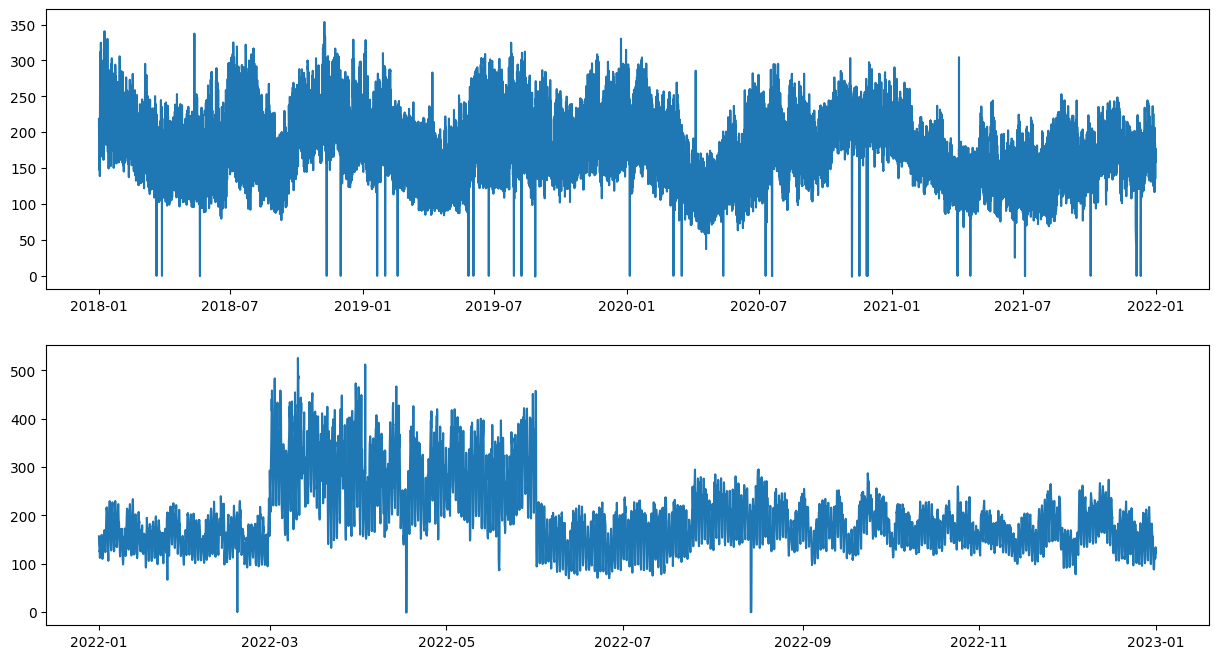

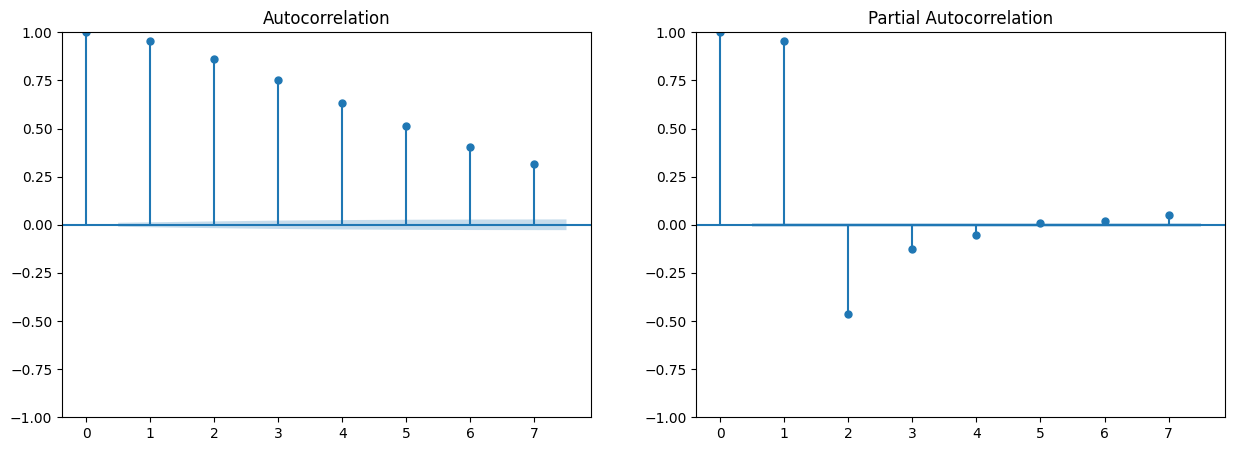

In [39]:
subestacion="LOSALME"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);